In [ ]:
%matplotlib inline


# Multivariate Functional Principal Components Analysis

This notebook shows how to perform an multivariate functional principal
components analysis on an example dataset.


In [1]:
# Author: Zara Waheed <zara95@bu.edu>
# License: MIT

# shinx_gallery_thumbnail_number = 2

import matplotlib.pyplot as plt
import pandas as pd

from FDApy.representation.functional_data import MultivariateFunctionalData
from FDApy.preprocessing.dim_reduction.fpca import MFPCA
from FDApy.visualization.plot import plot
from FDApy.misc.loader import read_csv

In [2]:
def wf(x):
    return '/Users/zarawaheed/Documents/BostonUniversity/MA679/Final Project/Data/' + x

Load the data as DenseFunctionalData.



In [6]:
V_GRF_stance_N = read_csv(wf('V_GRF_stance_N.csv'))
ML_GRF_stance_N = read_csv(wf('ML_GRF_stance_N.csv'))
AP_GRF_stance_N = read_csv(wf('AP_GRF_stance_N.csv'))

#ML_GRF_stance_N = ML_GRF_stance_N.reset_index()
#AP_GRF_stance_N = AP_GRF_stance_N.reset_index()

In [13]:
# Create multivariate functional data

GRF = MultivariateFunctionalData([AP_GRF_stance_N, ML_GRF_stance_N, V_GRF_stance_N])

Perform a multivariate functional PCA and explore the results.



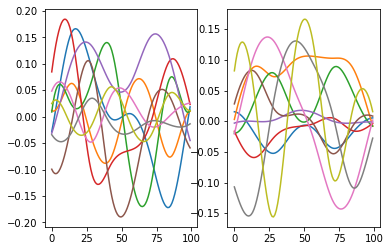

In [14]:
# Perform multivariate FPCA
mfpca = MFPCA(n_components=[0.99, 0.95])
mfpca.fit(GRF, method='NumInt')

# Plot the results of the FPCA (eigenfunctions)
fig, (ax1, ax2) = plt.subplots(1, 2)
_ = plot(mfpca.basis[0], ax=ax1)
_ = plot(mfpca.basis[1], ax=ax2)

Compute the scores of the dailyTemp data into the eigenfunctions basis using
numerical integration.



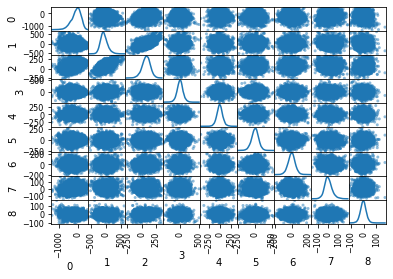

In [15]:
# Compute the scores
GRF_proj = mfpca.transform(GRF)

# Plot the projection of the data onto the eigenfunctions
_ = pd.plotting.scatter_matrix(pd.DataFrame(GRF_proj), diagonal='kde')

Then, we can test if the reconstruction of the data is good.



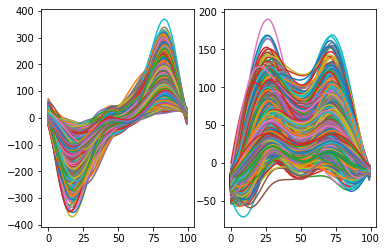

In [16]:
# Test if the reconstruction is good.
GRF_reconst = mfpca.inverse_transform(GRF_proj)

# Plot the reconstructed curves
fig, (ax1, ax2) = plt.subplots(1, 2)
_ = plot(GRF_reconst[0], ax=ax1)
_ = plot(GRF_reconst[1], ax=ax2)